# Importing Libraries and Data Loading


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Data Project Store.xlsx')
df.head()

,Product ID,Order ID,Order Date,Product name,Order Priority,Order Quantity,Unit Price,Discount,Shipping Price,Total,...,Shipping Cost,Box Cost,Delivery Date,Product Category,Product Base Margin,Customer Id,Customer Name,Region,Customer Segment,Revenue
0,PFS127009,200920,2017-09-10,"7"" Dog Frisbee",Low,7,40.95,0.04,1.75,286.65,...,1.23,5.42,2017-09-18,Pet,0.4206,100922001,Muhammed MacIntyre,Nunavut,Small Business,109.10
1,PFS127010,200921,2017-08-16,Google Infant Short Sleeve Tee Green,Medium,1,23.70,0.07,3.00,23.70,...,2.10,0.56,2017-08-22,Infant,0.3804,100922002,Barry French,Nunavut,Consumer,5.72
2,PFS127011,200922,2017-11-03,BLM Sweatshirt,High,3,24.30,0.01,6.00,72.90,...,4.20,0.56,2017-11-06,Apparel,0.3722,100922003,Clay Rozendal,Nunavut,Corporate,22.10
3,PFS127025,200923,2017-04-04,Google Baby Essentials Set,Critical,9,15.60,0.08,7.50,140.40,...,5.25,1.18,2017-04-06,Infant,0.6966,100922004,Carlos Soltero,Nunavut,Home Office,83.55
4,PFS127026,200924,2017-03-15,Google 17oz Stainless Steel Sport Bottle,Very Low,12,15.77,0.08,2.33,189.23,...,1.63,0.38,2017-03-25,Water Bottles,0.6850,100922005,Carl Jackson,Nunavut,Consumer,117.24


In [3]:
df.shape

(18782, 22)

In [4]:
df.describe()

,Order ID,Order Date,Order Quantity,Unit Price,Discount,Shipping Price,Total,Total After Discount,Shipping Cost,Box Cost,Delivery Date,Product Base Margin,Customer Id,Revenue
count,18782.000000,18782,18782.000000,18782.000000,18782.000000,18782.000000,18782.000000,18782.000000,18782.000000,18782.000000,18782,18782.000000,1.878200e+04,18782.000000
mean,209487.153338,2017-07-02 06:58:32.213821696,8.502236,43.059137,0.049661,5.945581,364.813985,356.581771,4.163115,1.160997,2017-07-07 18:26:52.352252160,0.677580,1.009224e+08,229.233117
min,200920.000000,2017-01-01 00:00:00,1.000000,0.530000,0.000000,1.000000,0.530000,0.480000,0.700000,0.340000,2017-01-02 00:00:00,0.305800,1.009220e+08,-11.570000
25%,204752.250000,2017-04-02 00:00:00,4.000000,16.650000,0.020000,3.000000,55.220000,53.470000,2.100000,0.560000,2017-04-08 00:00:00,0.620600,1.009222e+08,28.830000
50%,209447.500000,2017-07-02 00:00:00,8.000000,21.940000,0.050000,4.500000,165.670000,159.640000,3.150000,0.560000,2017-07-07 00:00:00,0.696600,1.009224e+08,102.710000
75%,214142.750000,2017-10-02 00:00:00,12.000000,40.950000,0.080000,7.500000,366.370000,354.010000,5.250000,1.180000,2017-10-07 00:00:00,0.760800,1.009227e+08,235.307500
max,218838.000000,2017-12-31 00:00:00,32.000000,453.700000,0.250000,20.250000,9981.400000,9981.400000,14.180000,5.420000,2018-01-10 00:00:00,0.947900,1.009230e+08,6949.030000
std,5359.159419,NaN,5.817721,63.593691,0.031859,4.199424,697.072824,681.865006,2.940262,1.406553,NaN,0.149893,2.715458e+02,445.654004


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18782 entries, 0 to 18781
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Product ID            18782 non-null  object        
 1   Order ID              18782 non-null  int64         
 2   Order Date            18782 non-null  datetime64[ns]
 3   Product name          18782 non-null  object        
 4   Order Priority        18782 non-null  object        
 5   Order Quantity        18782 non-null  int64         
 6   Unit Price            18782 non-null  float64       
 7   Discount              18782 non-null  float64       
 8   Shipping Price        18782 non-null  float64       
 9   Total                 18782 non-null  float64       
 10  Total After Discount  18782 non-null  float64       
 11  Box Size              18782 non-null  object        
 12  Shipping Cost         18782 non-null  float64       
 13  Box Cost        

# Data Cleaning and Data Preprocessing

In [6]:
df.isnull().sum()

Product ID              0
Order ID                0
Order Date              0
Product name            0
Order Priority          0
Order Quantity          0
Unit Price              0
Discount                0
Shipping Price          0
Total                   0
Total After Discount    0
Box Size                0
Shipping Cost           0
Box Cost                0
Delivery Date           0
Product Category        0
Product Base Margin     0
Customer Id             0
Customer Name           0
Region                  0
Customer Segment        0
Revenue                 0
dtype: int64

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'], format='%m/%d/%Y')

In [8]:
# Define columns that contain monetary values
price_columns = ['Unit Price', 'Total', 'Total After Discount', 'Shipping Cost', 'Box Cost', 'Revenue']

# Clean and convert monetary columns to float
for col in price_columns:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

# EDA

Numerical Features Visualization

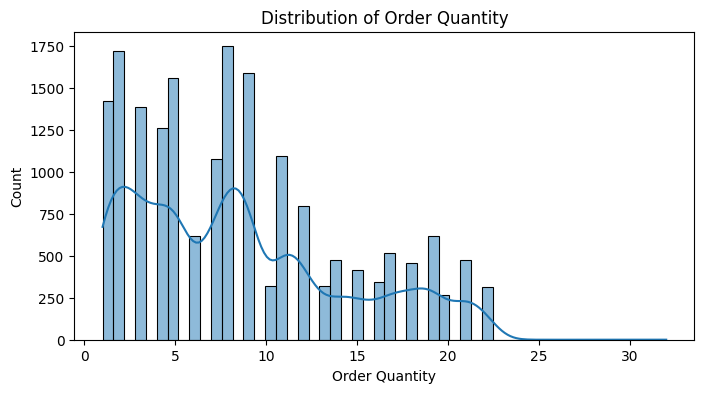

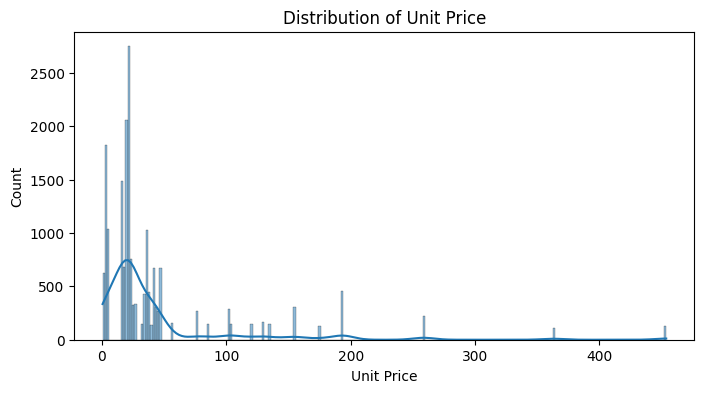

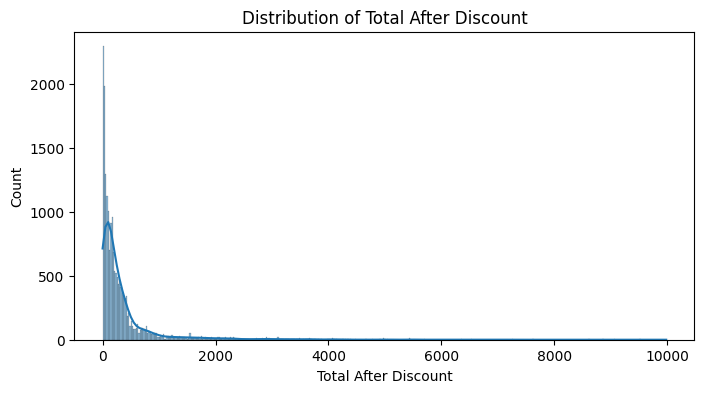

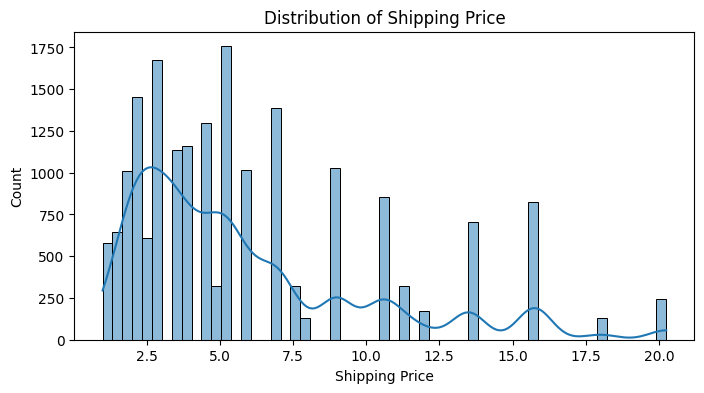

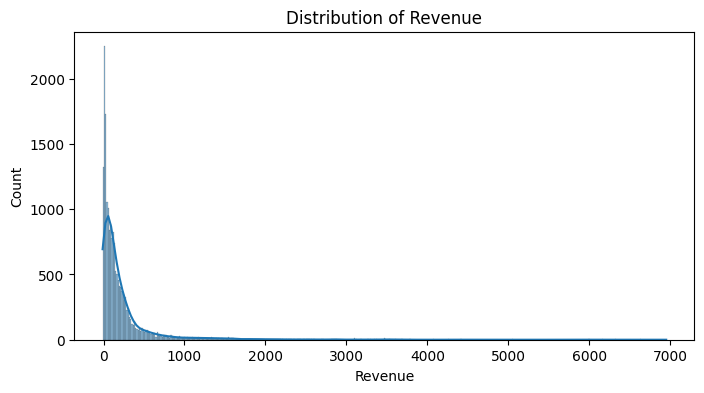

In [9]:
#Numerical Features Visualization
numerical_features = ['Order Quantity', 'Unit Price', 'Total After Discount', 'Shipping Price', 'Revenue']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.show()

Categorical features visualization

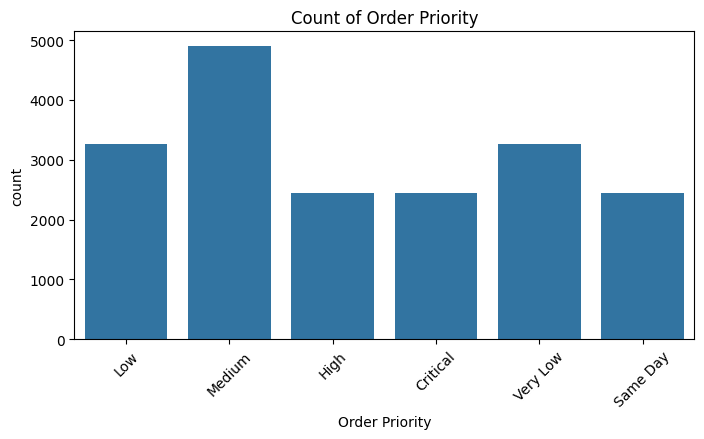

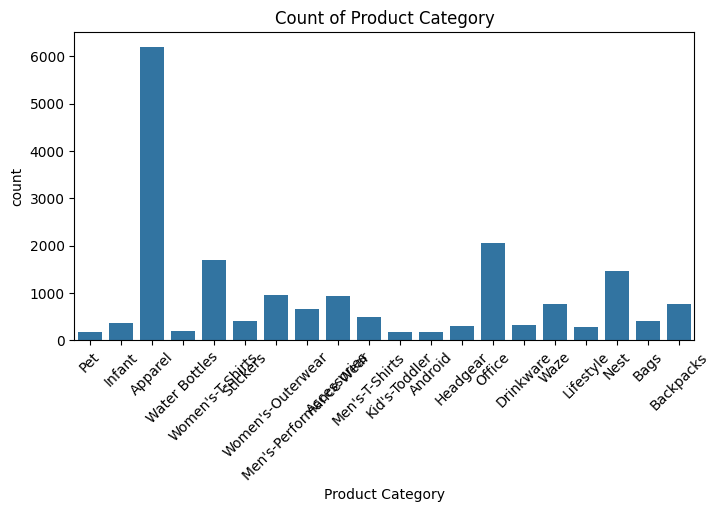

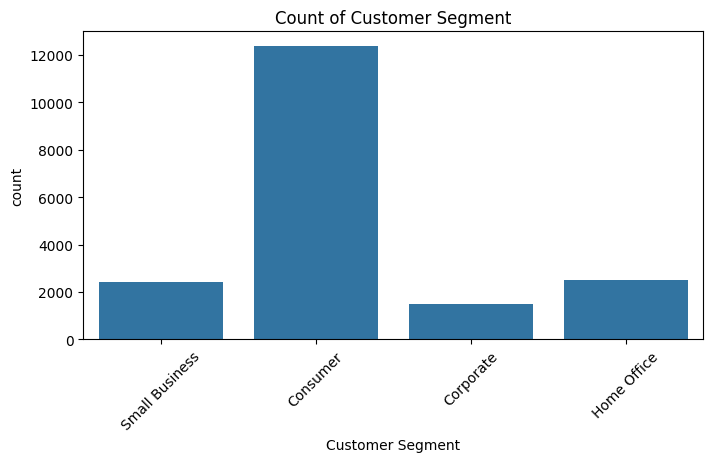

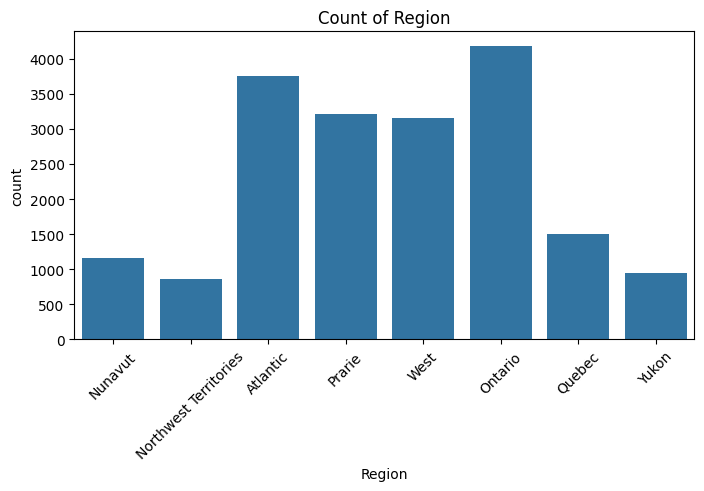

In [10]:
# Categorical features visualization
categorical_features = ['Order Priority', 'Product Category', 'Customer Segment', 'Region']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)
    plt.show()

Correlation Analysis

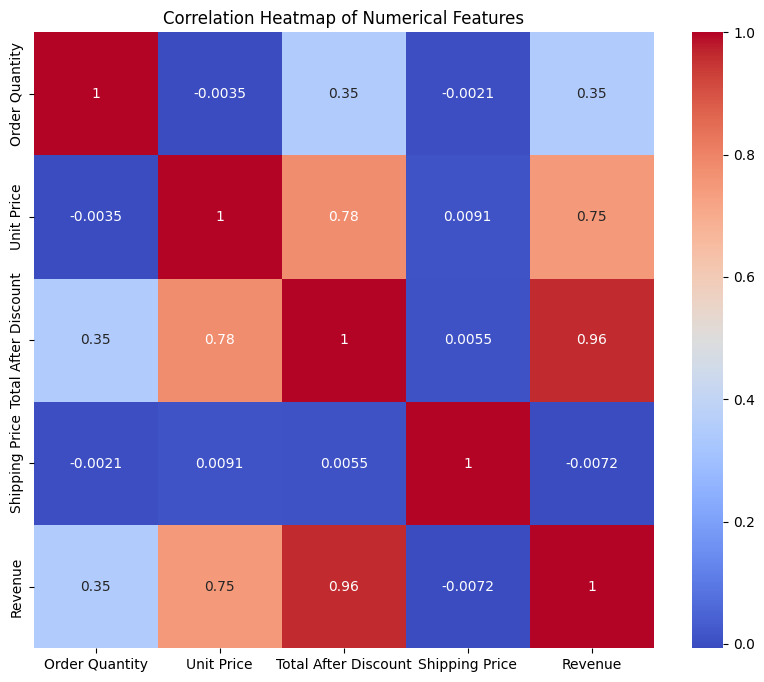

In [11]:
# Correlation analysis
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix for numerical features
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

Profit Margin Calculation and Visualization


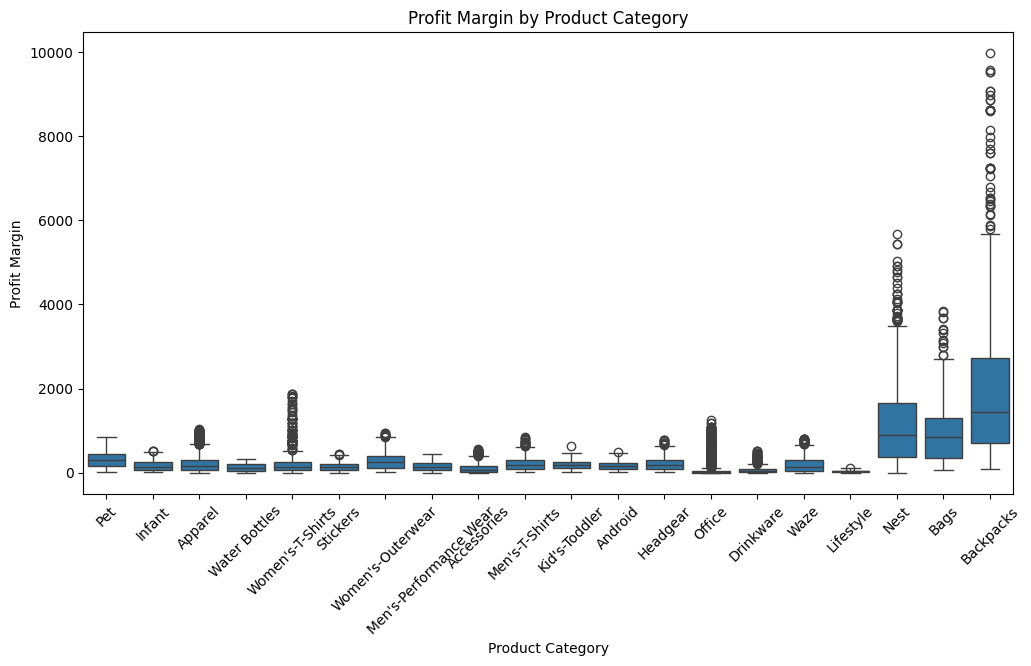

In [12]:
# Calculating Profit Margin if necessary
df['Profit Margin'] = df['Total After Discount'] - df['Shipping Cost'] - df['Box Cost']

# Boxplot of Profit Margin by Product Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product Category', y='Profit Margin', data=df)
plt.xticks(rotation=45)
plt.title('Profit Margin by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Profit Margin')
plt.show()

Revenue Analysis 


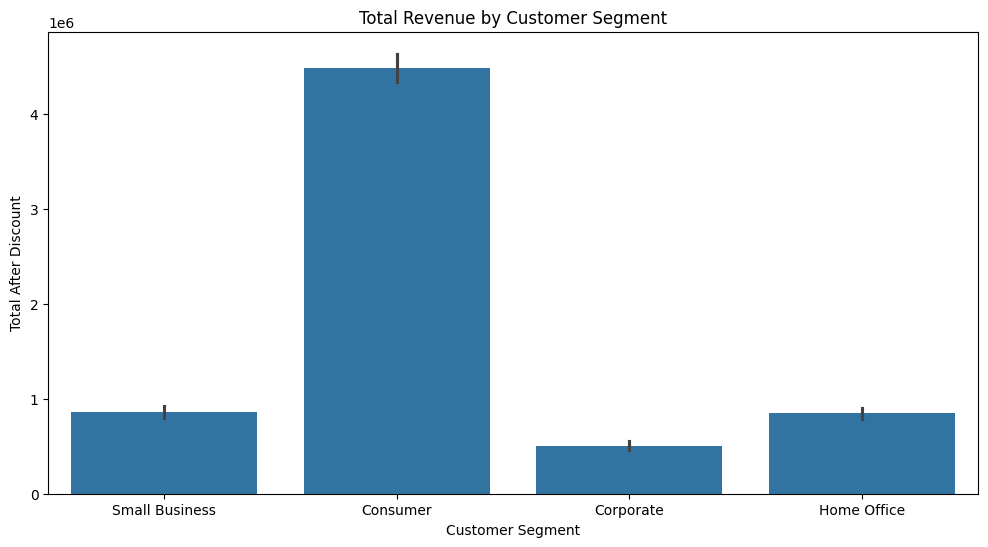

In [13]:
# Bar plot of Total After Discount by Customer Segment
plt.figure(figsize=(12, 6))
sns.barplot(x='Customer Segment', y='Total After Discount', data=df, estimator=sum)
plt.title('Total Revenue by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total After Discount')
plt.show()

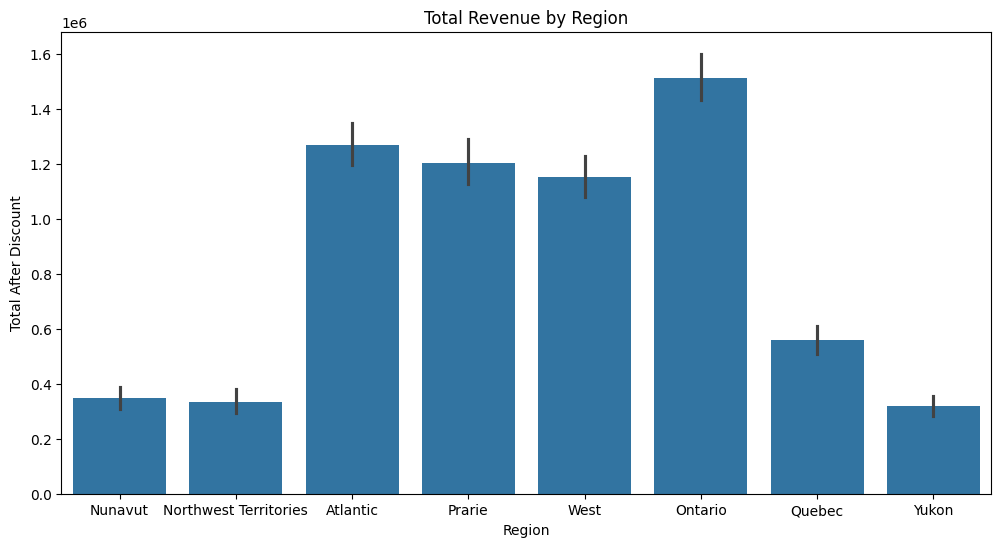

In [14]:
# Bar plot of Total After Discount by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Total After Discount', data=df, estimator=sum)
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total After Discount')
plt.show()

Time-Series Analysis 

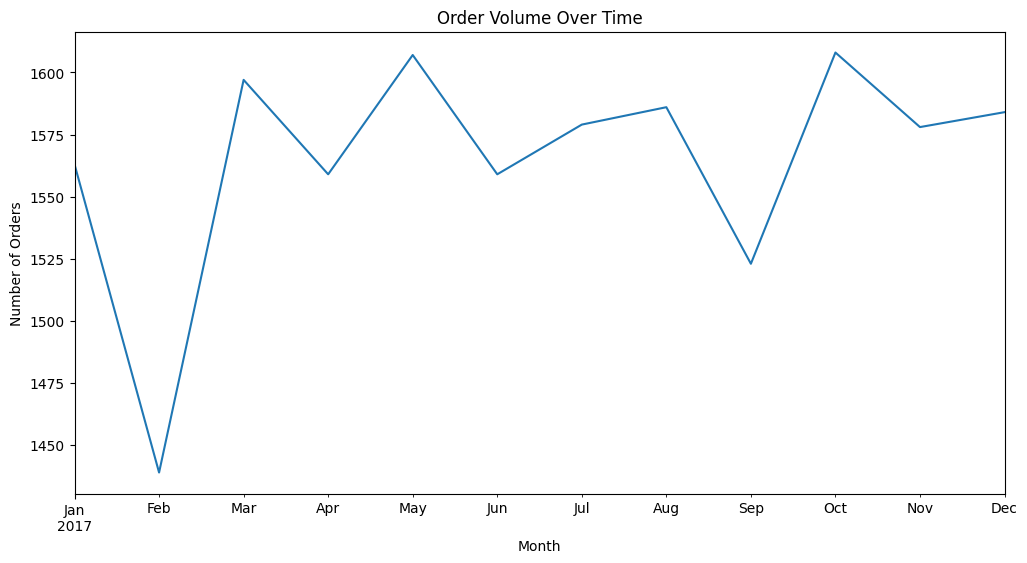

In [15]:
# Extracting month from Order Date for time-series analysis
df['Order Month'] = df['Order Date'].dt.to_period('M')

# Plotting order frequency over time
plt.figure(figsize=(12, 6))
df['Order Month'].value_counts().sort_index().plot(kind='line')
plt.title('Order Volume Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

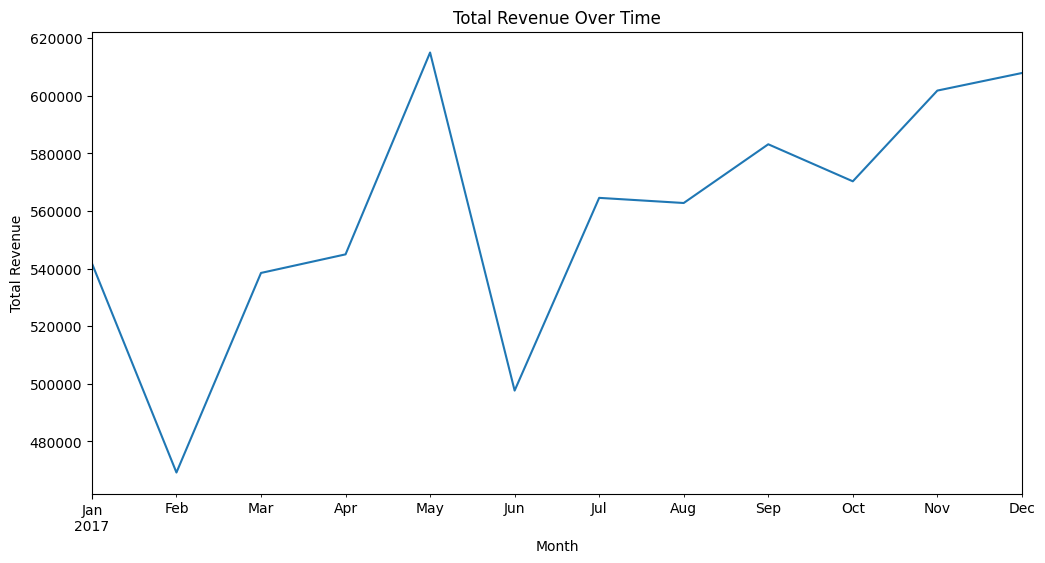

In [16]:
# Calculating monthly revenue
monthly_revenue = df.groupby('Order Month')['Total After Discount'].sum()

# Plotting total revenue over time
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line')
plt.title('Total Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

# Model Training and Evaluation for Customer Segment Prediction

In [17]:
#Creating features (X) and target (y)
X = pd.get_dummies(df[['Region', 'Order Quantity', 'Product Category', 'Total After Discount']], drop_first=True)
y = df['Customer Segment']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Classifier': SVC()
}

In [20]:

accuracy_scores = {}
conf_matrices = {}

In [21]:
for name, model in models.items():
    # Trainning the model
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)

    # Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

    # Printing classification report
    print(f"Model: {name}\n")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Model: Logistic Regression

                precision    recall  f1-score   support

      Consumer       0.64      1.00      0.78      2414
     Corporate       0.00      0.00      0.00       305
   Home Office       0.00      0.00      0.00       533
Small Business       0.00      0.00      0.00       505

      accuracy                           0.64      3757
     macro avg       0.16      0.25      0.20      3757
  weighted avg       0.41      0.64      0.50      3757

--------------------------------------------------
Model: Decision Tree

                precision    recall  f1-score   support

      Consumer       0.65      0.70      0.68      2414
     Corporate       0.07      0.07      0.07       305
   Home Office       0.16      0.13      0.14       533
Small Business       0.13      0.11      0.12       505

      accuracy                           0.49      3757
     macro avg       0.25      0.25      0.25      3757
  weighted avg       0.46      0.49      0.48      375

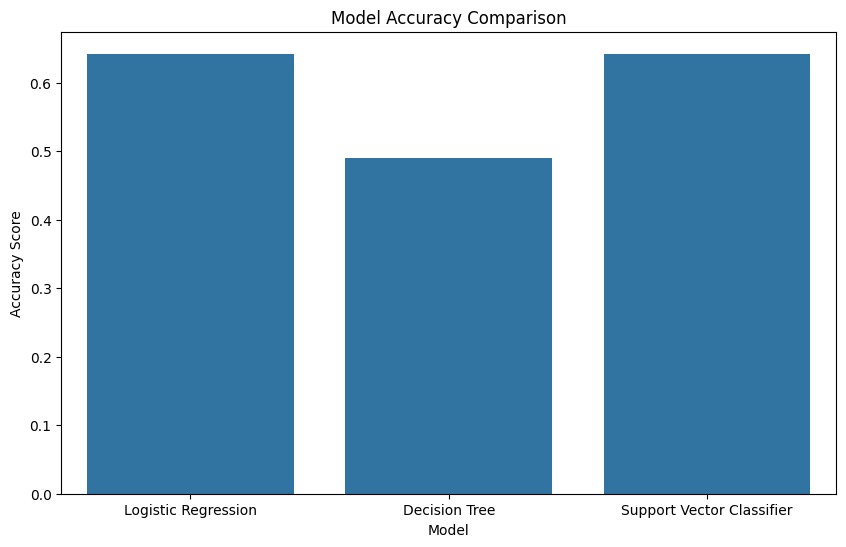

In [22]:
# Plotting Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.show()

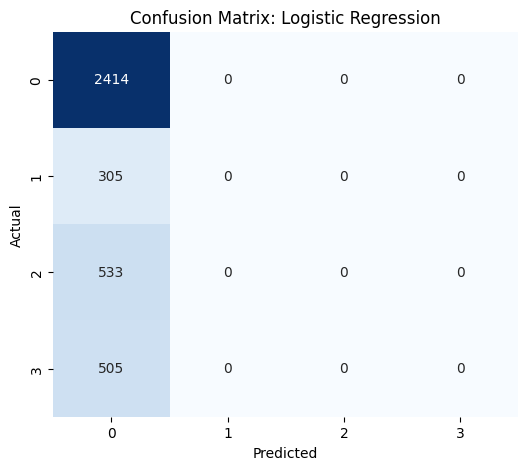

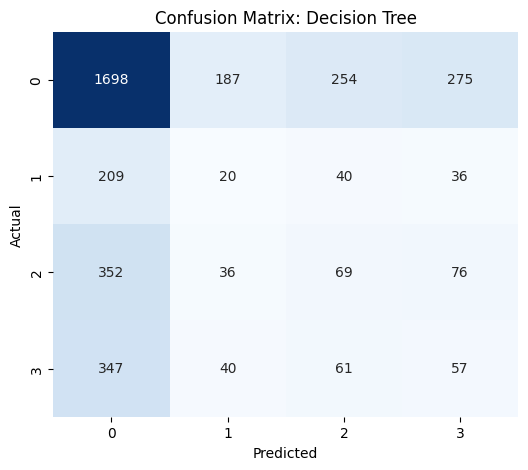

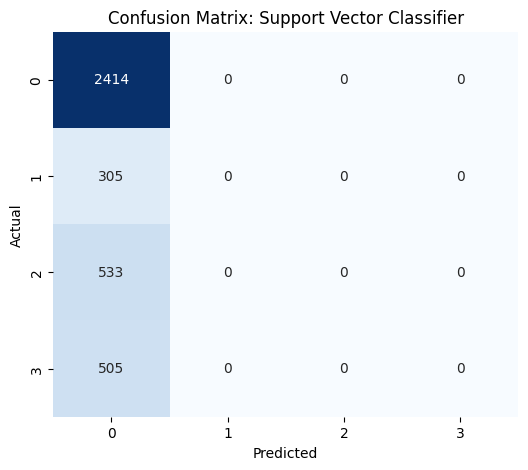

In [23]:
# Plotting confusion matrices for each model
for name, cm in conf_matrices.items():
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Model Tuning and Hyperparameter Optimization for Logistic Regression

In [24]:
# List of different values for regularization parameter 'C'
C_values = [0.01, 0.1, 1.0, 10.0, 100.0]
accuracies = []

In [25]:
# Initializing variables to keep track of best model 
best_accuracy = 0
best_model = None
best_C = None

In [26]:
# Iterating over the list of C values to tune the hyperparameter
for C in C_values:
    model = LogisticRegression(C=C, solver='liblinear')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((C, accuracy))

    print(f'Accuracy for C={C}: {accuracy:.4f}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_C = C

Accuracy for C=0.01: 0.6425
Accuracy for C=0.1: 0.6425
Accuracy for C=1.0: 0.6425
Accuracy for C=10.0: 0.6425
Accuracy for C=100.0: 0.6425


In [27]:

print(f'Best C: {best_C} with accuracy: {best_accuracy:.4f}')
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))

Best C: 0.01 with accuracy: 0.6425
                precision    recall  f1-score   support

      Consumer       0.64      1.00      0.78      2414
     Corporate       0.00      0.00      0.00       305
   Home Office       0.00      0.00      0.00       533
Small Business       0.00      0.00      0.00       505

      accuracy                           0.64      3757
     macro avg       0.16      0.25      0.20      3757
  weighted avg       0.41      0.64      0.50      3757



Evaluation of Best Model: Confusion Matrix

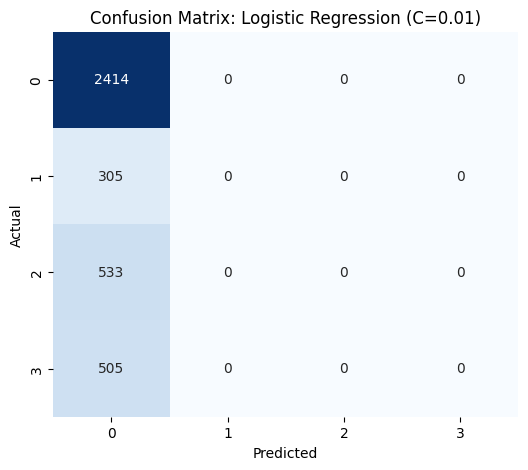

In [28]:
# Generate the confusion matrix for the best model's predictions
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Create a figure for the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix: Logistic Regression (C={best_C})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Visualization of Tuning Results

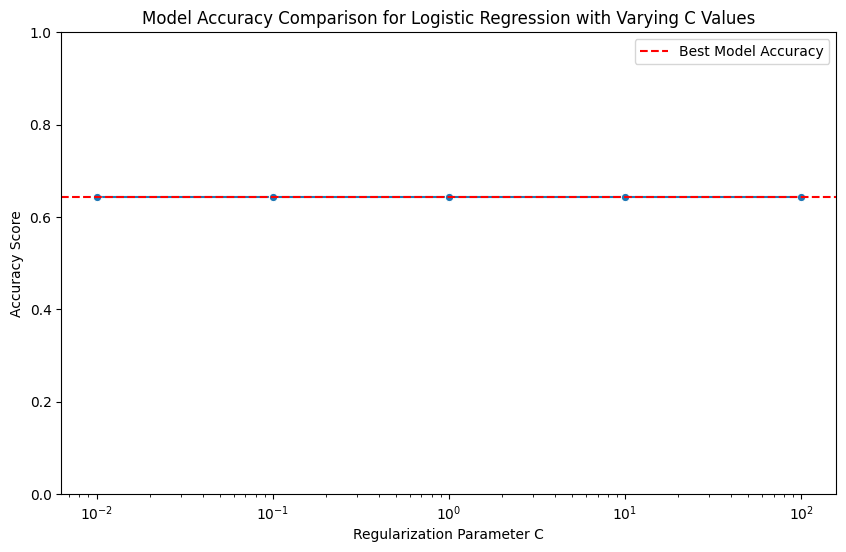

In [29]:
accuracy_df = pd.DataFrame(accuracies, columns=['C Value', 'Accuracy'])

plt.figure(figsize=(10, 6))
sns.lineplot(data=accuracy_df, x='C Value', y='Accuracy', marker='o')
plt.title("Model Accuracy Comparison for Logistic Regression with Varying C Values")
plt.xlabel("Regularization Parameter C")
plt.ylabel("Accuracy Score")
plt.xscale('log')
plt.ylim(0, 1)
plt.axhline(best_accuracy, color='r', linestyle='--', label='Best Model Accuracy')
plt.legend()
plt.show()